In [256]:
import pandas as pd
import numpy as np
uri = 'Titanic_sc_data.csv'
df = pd.read_csv(uri)
df.head()

,Unnamed: 0,sex,pclass,who,alone,fare,sex_,pclass_,who_,alone_,fare_,survived_
0,0,male,3,adult,False,7.2500,1,2,0,0,18,0
1,1,female,1,adult,False,71.2833,0,0,0,0,207,1
2,2,female,3,adult,True,7.9250,0,2,0,1,41,1
3,3,female,1,adult,False,53.1000,0,0,0,0,189,1
4,4,male,3,adult,True,8.0500,1,2,0,1,43,0


In [257]:
col_select = ['sex_', 'pclass_', 'who_', 'alone_', 'fare_'] # เลือกคอลัมน์ทำ normalization
X = df[col_select]

In [258]:
y = df['survived_']

In [259]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state= 2020) # แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)

## https://xgboost.readthedocs.io/en/latest/

In [260]:
import xgboost as xgb

In [261]:
params = {'max_depth': 10}
params['eval_metric'] = 'auc' # เพิ่มใน deictionary
# ปกติจะเป็น regression ต้องปรับ params เพิ่มให้เป๋น Classifier โดยใช้ objective='multi:softmax'

In [262]:
d_train = xgb.DMatrix(X_train, y_train)

In [263]:
%%time
clf_xgb = xgb.train(params, d_train, num_boost_round= 10)

Wall time: 17 ms


In [264]:
d_train = xgb.DMatrix(X_train, y_train)

In [265]:
d_test = xgb.DMatrix(X_test, y_test)

In [266]:
y_test_pred = clf_xgb.predict(d_test) # ออกเปเป็น ปัญหา regression

In [267]:
print(y_test_pred)

[0.18238997 0.22669318 0.79617345 0.43110794 0.03224128 0.04691845
 0.38989216 0.03839067 0.1266908  0.2328805  0.14248925 0.03445852
 0.98333585 0.9601172  0.9358442  0.2751389  0.07539922 0.14248925
 0.14248925 0.26391616 0.9849298  0.03224128 0.08684105 0.95213115
 0.18238997 0.9849298  0.22127402 0.2751389  0.14312541 0.97106326
 0.18238997 0.4873181  0.02321479 0.98333585 0.9386824  0.14248925
 0.04728678 0.18238997 0.02321479 0.9386824  0.97131246 0.4138149
 0.04129103 0.97106326 0.18238997 0.97142315 0.04129103 0.0265708
 0.03459641 0.9386824  0.04129103 0.02950469 0.14248925 0.0265708
 0.02321479 0.97106326 0.98061025 0.11134288 0.07241812 0.98061025
 0.9849298  0.98061025 0.03507686 0.07813275 0.02321479 0.8852755
 0.98333585 0.08430246 0.94105935 0.9849298  0.8295058  0.26391616
 0.03839067 0.06657442 0.04030415 0.43110794 0.9852402  0.03507686
 0.9084263  0.7017431  0.964115   0.96584165 0.02321479 0.9849298
 0.4138149  0.02321479 0.04728678 0.08430246 0.5656247  0.69396436


In [268]:
#ปรับ
y_pred = [round(i) for i in y_test_pred] # ใช้ round เพื่อปัด เศษ

In [269]:
y_pred[:3]

[0, 0, 1]

In [270]:
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#แยก ทำ target
class_names = ['unsurvived', 'survived']
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_test, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)
y_test

Accuracy Score: 0.831
              precision    recall  f1-score   support

  unsurvived       0.84      0.88      0.86       104
    survived       0.82      0.76      0.79        74

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178

[[92 12]
 [18 56]]


884    0
199    0
327    1
516    0
252    0
      ..
393    1
204    0
137    0
413    1
398    1
Name: survived_, Length: 178, dtype: int64

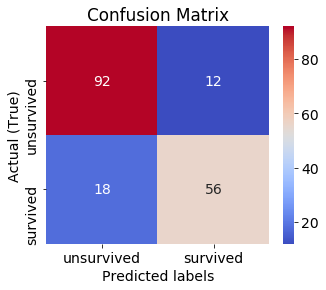

In [271]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_test, y_pred) # คำนวณค่า Confusion Matrix
# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

y_targets = ['unsurvived', 'survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 

#ใช้ scikitplot สร้าง 
#import scikitplot as skplot
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()

# ปรับเป็นปัญหา classification

In [272]:
from xgboost import XGBClassifier
from time import time
from sklearn.model_selection import cross_val_score

In [273]:
model_xgb = XGBClassifier()
start = time() # เวลาเริ่มต้น train
model_xgb.fit(X_train, y_train)
finish_xgb = time() -start
print('{:.5f} sec'.format(finish_xgb)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_xgb, X, y, cv=10) # k=5
cvs_xgb = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.05200 sec
Cross val scores [0.7753 0.8315 0.764  0.8202 0.8989 0.8427 0.8539 0.8315 0.8427 0.8182]
mean 82.7886 %


# การประเมิณ Model

In [275]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Test
y_predict = model_xgb.predict(X_test)
y_pred = y_predict # กำหนดให้ yที่ทำนายได้ คือ y_pred
y_true = y_test # กำหนดให้ yที่ทดสอบ คือ y_true
#แยก ทำ target
class_names = ['unsurvived', 'survived']
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Score : {:.3f}'.format(model_xgb.score(X_test,y_test)))
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Total X: 889
Total train: 711
Total test: 178
Score : 0.826
Accuracy Score: 0.826
              precision    recall  f1-score   support

  unsurvived       0.83      0.88      0.86       104
    survived       0.82      0.74      0.78        74

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.83      0.83      0.82       178

[[92 12]
 [19 55]]


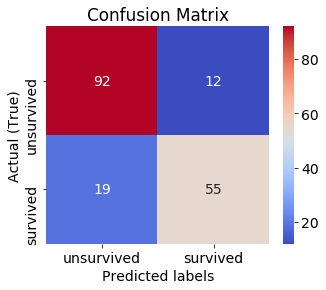

In [276]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_true, y_pred) # คำนวณค่า Confusion Matrix
# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

y_targets = ['unsurvived', 'survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 

#ใช้ scikitplot สร้าง 
#import scikitplot as skplot
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()